# Capstone Project: Books recommender system

### Overall Contents:
- Background
- Data Collection
- Data Cleaning Books Interactions
- Data Cleaning Booklist
- Exploratory Data Analysis
* Non-personalized recommendation
    - [Modeling 1 Popularity-based and Content-based recommendation system](#6.-Modeling-1-Non-personalized-recommendation)<br>**(In this notebook)**
* Personalized recommendation
    - Modeling 2 Collaborative-filtering based recommendation system
    - Modeling 3 Clustering-Collaborative-filtering-based recommendation system 
    - Modeling 4 Model-based recommendation systems
- Evaluation
- Conclusion and Recommendation

### Datasets

The dataset are obtained from [University of California San Diego Book Graph](https://sites.google.com/eng.ucsd.edu/ucsdbookgraph/home?authuser=0).

The dataset below, which is user-book interactions and reference will be used for recommender system.

User-book interactions:-
* user_work_interactions
* user_work_interactions_model
* user_work_interactions_sample
* genrebook_interactions

Reference:-
* booklist_worktitle
* booklist_url

For more details on the datasets, please refer to the data_dictionary_model.ipynb.

## Modeling

For this dataset, we will be categorizing the recommendation system as followed:-
1. Non-personalized recommendation
    * Popularity recommender system
    * Content-based recommender system


2. Personalized recommendation
    * Collaborative-filtering recommender system
    * Clustering-Collaborative-filtering recommender system
    * Model-based recommender system

For personalized recommender system, the model's success will be evaluated based on the root mean square error (RMSE) between the actual and the predicted rating. This prediction will allow the website to recommend books that are more suited to the readers. For this dataset, we will be performing a train/test split on our dataset to have a training set and a test set. In total, we will be using a null model as the baseline model and 6 models to fit the dataset and evaluate the models in predicting the ratings using the test set.

The five models are:-
1. Null Model
2. User-based Collaborative filtering 
3. Item-based Collaborative filtering
4. K-means clustering, User-based Collaborative filtering
5. K-means clustering, Item-based Collaborative filtering
6. Non-negative Matrix Factorization
7. Singular Value Decomposition
8. Singular Value Decomposition ++

## 6. Modeling 1 Non-personalized recommendation

We will be using the full datasets with the threshold applied.

### 6.1 Libraries Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import requests
from sklearn.metrics.pairwise import cosine_similarity
from book_recommender import popularity_based_recommender

%config InlineBackend.figure_format = 'retina'
%matplotlib inline 

# Maximum display of columns
pd.options.display.max_colwidth = 2000
pd.options.display.max_rows = 2000

### 6.2 Data Import

In [2]:
userbook_interactions = pd.read_parquet("../data/user_work_interactions_model_int.parquet")
genrebook_interactions = pd.read_parquet("../data/genrebook_interactions_model.parquet")
booklist_url = pd.read_parquet("../data/booklist_url.parquet")

### 6.3 Popularity-based recommender system

The popularity-based recommender system will be based on popularity with reference to IMDB weighted rating methodology.

In [3]:
print(f"The userbook_interactions unique work id is {userbook_interactions.work_id.nunique()}")
print(f"The top 10% of the book has {0.1*(userbook_interactions.work_id.nunique())} number of books.")

The userbook_interactions unique work id is 15014
The top 10% of the book has 1501.4 number of books.


In [4]:
# To recommend books based on popularity-based system
booklist_worktitle = booklist_url[["work_id", "first_author_title", "first_author_name", "title"]]
popular_books = popularity_based_recommender(userbook_interactions, "work_id", "rating", "user_id", booklist_worktitle, 0.9)
popular_books.sort_values(by="weighted_average", ascending = False).head(10)

work_id  average_rating  num_votes  weighted_average  \
0   2963218        4.625602     175001          4.597269   
1   2402163        4.562587     188442          4.538603   
2  25126749        4.720290      23553          4.530863   
3   2962492        4.759227      19400          4.529697   
4  41335427        4.551852     171805          4.526091   
5   3046572        4.548139     180414          4.523706   
6   4640799        4.499423     290956          4.485261   
7   6309710        4.594093      32133          4.469523   
8   2809203        4.480861     174880          4.458446   
9   1164465        4.520769      53204          4.448491   

                                         first_author_title  \
0       J.K. Rowling - Harry Potter and the Deathly Hallows   
1   J.K. Rowling - Harry Potter and the Prisoner of Azkaban   
2                  Sarah J. Maas - A Court of Mist and Fury   
3            J.K. Rowling - Complete Harry Potter Boxed Set   
4     J.K. Rowling - Harry Potter and the Half-Blood Prince   
5        J.K. Rowling - Harry Potter and the Goblet of Fire   
6   J.K. Rowling - Harry Potter and the Philosopher's Stone   
7                      Cassandra Clare - Clockwork Princess   
8  J.K. Rowling - Harry Potter and the Order of the Phoenix   
9                    George R.R. Martin - A Storm of Swords   

    first_author_name                                      title  
0        J.K. Rowling       Harry Potter and the Deathly Hallows  
1        J.K. Rowling   Harry Potter and the Prisoner of Azkaban  
2       Sarah J. Maas                   A Court of Mist and Fury  
3        J.K. Rowling            Complete Harry Potter Boxed Set  
4        J.K. Rowling     Harry Potter and the Half-Blood Prince  
5        J.K. Rowling        Harry Potter and the Goblet of Fire  
6        J.K. Rowling   Harry Potter and the Philosopher's Stone  
7     Cassandra Clare                         Clockwork Princess  
8        J.K. Rowling  Harry Potter and the Order of the Phoenix  
9  George R.R. Martin                          A Storm of Swords

**For image visualization**

In [5]:
# To merge the image_url to the recommended books dataframe
list_imageurl = booklist_url[["image_url", "work_id"]]
popular_books_url = pd.merge(popular_books, list_imageurl, on = "work_id", how = 'left')
top_10_books = popular_books_url.sort_values(by="weighted_average", ascending = False).head(10)

# Extract the images from the urls
top_10_popular_books = []

for i in range(len(top_10_books)):
    url = top_10_books.image_url[i]
    response = requests.get(url, stream=True)
    img = Image.open(response.raw)
    top_10_popular_books.append(img)

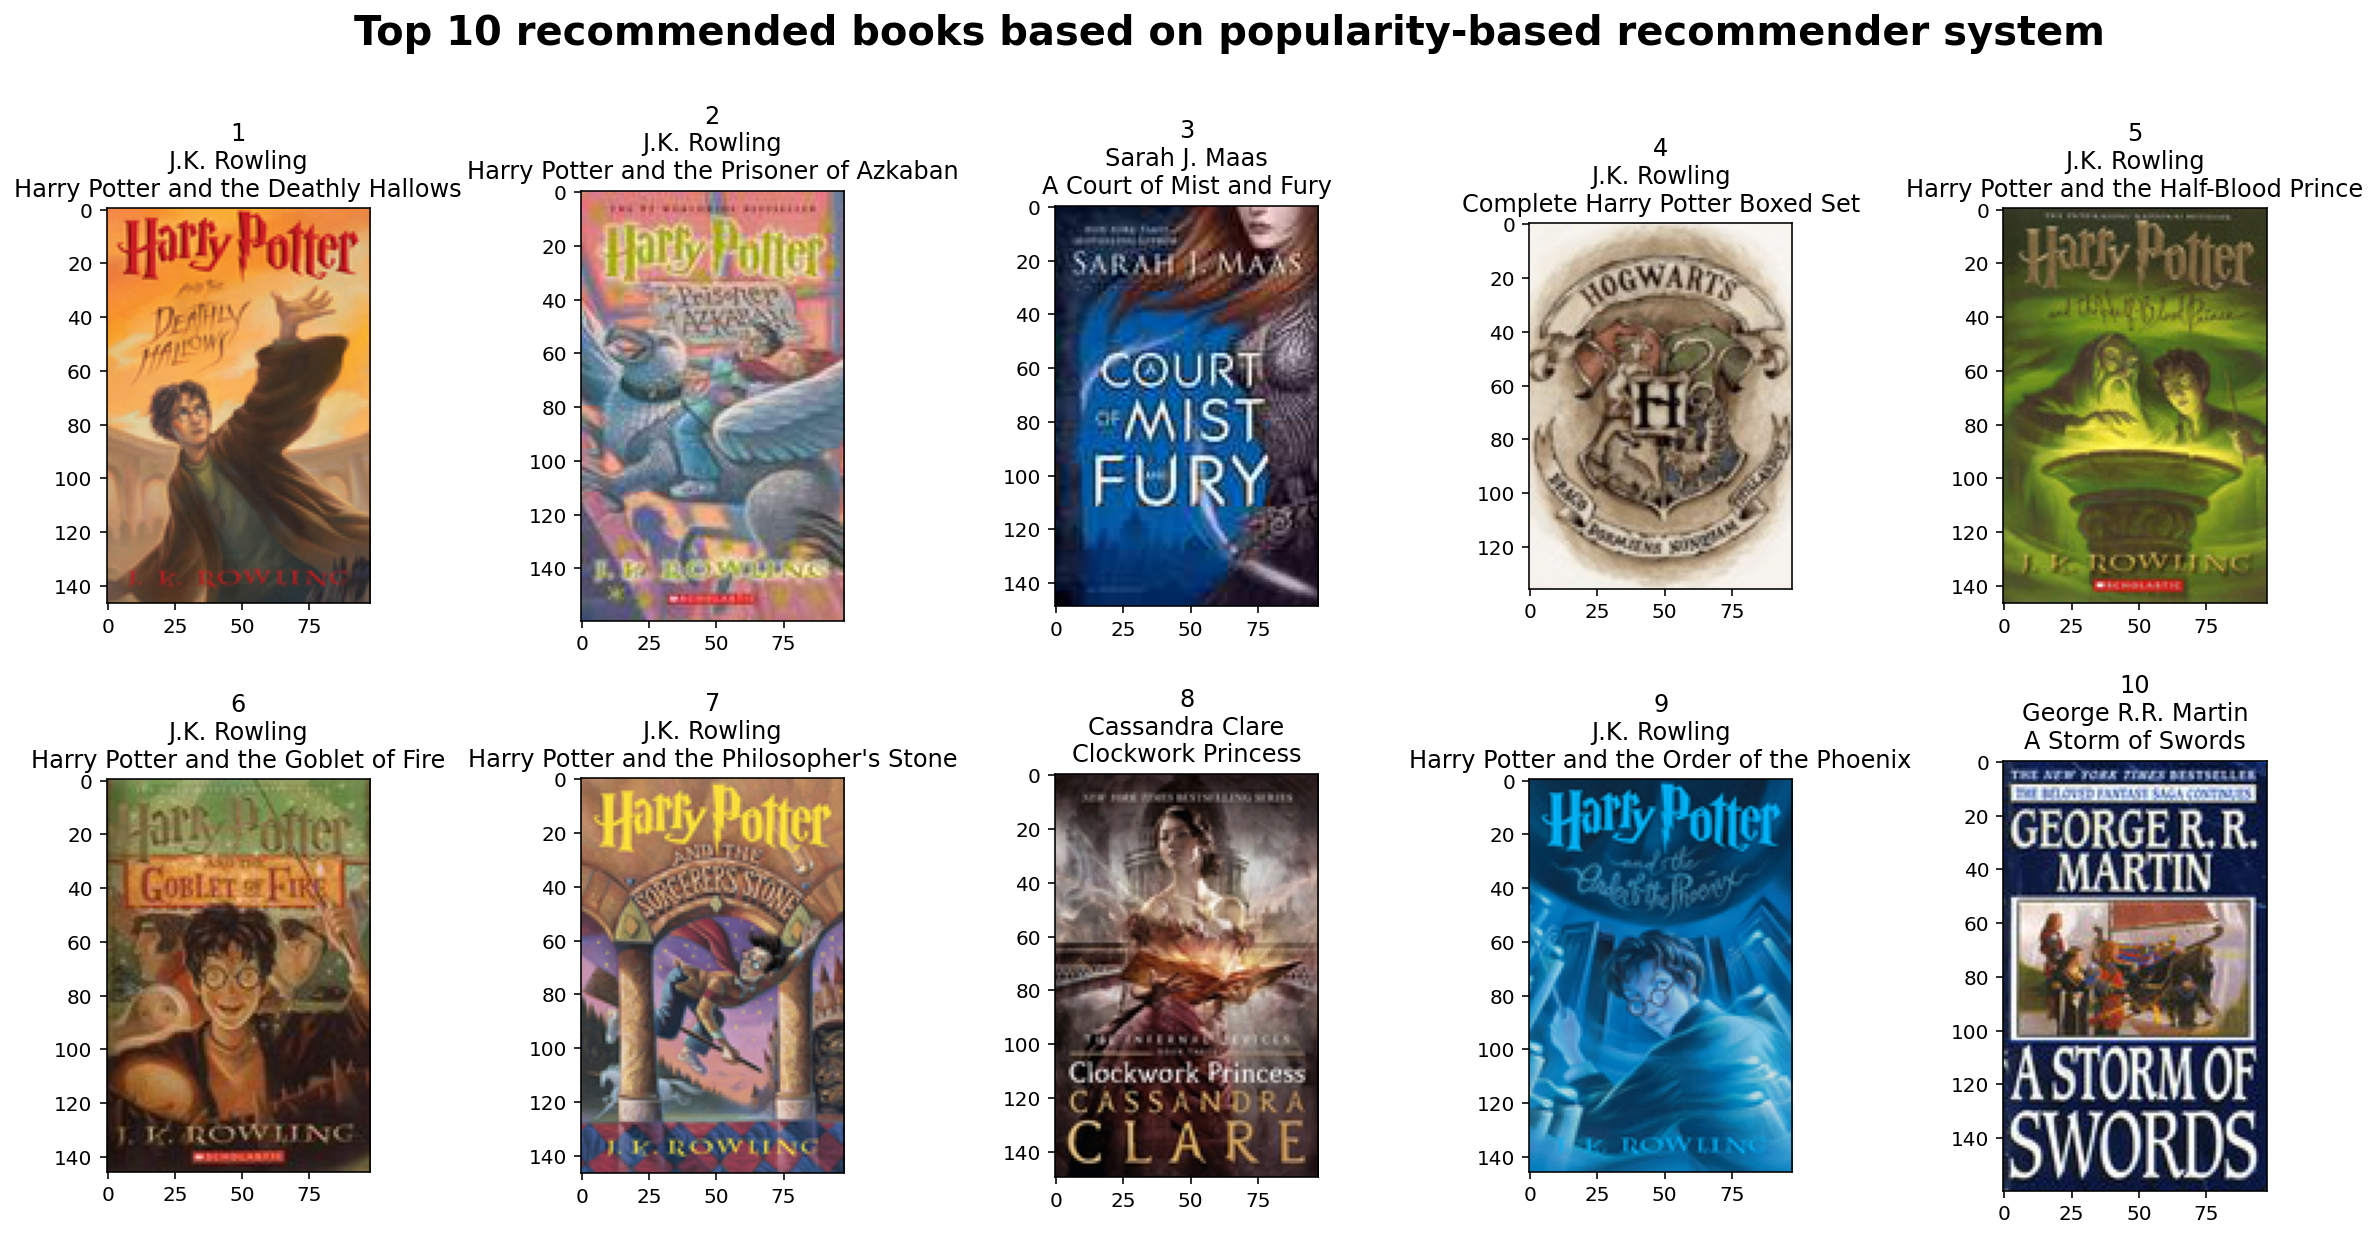

In [6]:
# Plot the top 10 recommended books based on popularity-based recommender system
plt.figure(figsize = (8,8))
plt.suptitle("Top 10 recommended books based on popularity-based recommender system\n", x = 1.10, y=1.15, fontsize = 20, weight = "bold");
plt.subplots_adjust(left=None, bottom=None, right=2.0, top=1.0, wspace=0.8, hspace=0.3)
for i in range(len(top_10_popular_books)):
    plt.subplot(2,5,(i+1))
    plt.title(f"{(i+1)}\n{top_10_books.first_author_name[i]}\n{top_10_books.title[i]}")
    plt.imshow(top_10_popular_books[i])
plt.show()

**Analysis: Almost all of J.K. Rowling books, which has a significant number of votes and average_rating are rated as the top 10 popular books**

With the use of IMDB weighted ratings that takes into account of number of voters and the average rating, J.K.Rowling books that has a very high number of votes with a slight low average_rating has made it into the top 10 popular books. This results coincide with the exploratory data analysis results in which J.K.Rowling has the highest rating counts of all the books and her books are rated as one of the best-selling books of all times. Meanwhile, there are three books that have lower number of votes but high average_rating are in the top 10 popular books. This suggests there are some novelty books apart from the highly popular books.

### 6.4 Content-based recommender system

In [7]:
print('Userbook interactions shape is : ', userbook_interactions.shape)
print('Userbook interactions number of unique user_id: ', userbook_interactions.user_id.nunique())
print('Userbook interactions number of unique work_id: ', userbook_interactions.work_id.nunique())

Userbook interactions shape is :  (62079740, 3)
Userbook interactions number of unique user_id:  603728
Userbook interactions number of unique work_id:  15014


In [8]:
# To ensure genrebook_interactions reflects work_id present in userbook_interactions
genrebook_interactions_cbs = genrebook_interactions.copy().reset_index()
userbook_interactions_workid = pd.DataFrame(userbook_interactions["work_id"].unique(), columns = ["work_id"])
genrebook_interactions_cbs = pd.merge(userbook_interactions_workid, genrebook_interactions_cbs, on = "work_id", how = 'left')
booklist_authortitle = booklist_worktitle[["work_id", "first_author_title"]]
genrebook_interactions_cbs = pd.merge(genrebook_interactions_cbs, booklist_authortitle, on = "work_id", how = 'left')
genrebook_interactions_cbs = genrebook_interactions_cbs.set_index("first_author_title")
genrebook_interactions_cbs = genrebook_interactions_cbs.drop("work_id", axis = 1)
print(f"The number of unique books is {genrebook_interactions_cbs.shape[0]}")
genrebook_interactions_cbs.head()

The number of unique books is 15014


children  \
first_author_title                                                                                    
Wilson Rawls - Where the Red Fern Grows                                                      3340.0   
Steven D. Levitt - Freakonomics: A Rogue Economist Explores the Hidden Side of Everything       NaN   
David Allen - Getting Things Done: How To Achieve Stress-free Productivity                      NaN   
Dan Simmons - The Rise of Endymion                                                              NaN   
Neil Gaiman - Neverwhere                                                                        NaN   

                                                                                           comics, graphic  \
first_author_title                                                                                           
Wilson Rawls - Where the Red Fern Grows                                                                NaN   
Steven D. Levitt - Freakonomics: A Rogue Economist Explores the Hidden Side of Everything              NaN   
David Allen - Getting Things Done: How To Achieve Stress-free Productivity                             NaN   
Dan Simmons - The Rise of Endymion                                                                     NaN   
Neil Gaiman - Neverwhere                                                                               NaN   

                                                                                           fantasy, paranormal  \
first_author_title                                                                                               
Wilson Rawls - Where the Red Fern Grows                                                                    NaN   
Steven D. Levitt - Freakonomics: A Rogue Economist Explores the Hidden Side of Everything                  NaN   
David Allen - Getting Things Done: How To Achieve Stress-free Productivity                                 NaN   
Dan Simmons - The Rise of Endymion                                                                       292.0   
Neil Gaiman - Neverwhere                                                                               17732.0   

                                                                                           fiction  \
first_author_title                                                                                   
Wilson Rawls - Where the Red Fern Grows                                                     3046.0   
Steven D. Levitt - Freakonomics: A Rogue Economist Explores the Hidden Side of Everything     42.0   
David Allen - Getting Things Done: How To Achieve Stress-free Productivity                     NaN   
Dan Simmons - The Rise of Endymion                                                          1514.0   
Neil Gaiman - Neverwhere                                                                    4850.0   

                                                                                           history, historical fiction, biography  \
first_author_title                                                                                                                  
Wilson Rawls - Where the Red Fern Grows                                                                                     486.0   
Steven D. Levitt - Freakonomics: A Rogue Economist Explores the Hidden Side of Everything                                    95.0   
David Allen - Getting Things Done: How To Achieve Stress-free Productivity                                                    NaN   
Dan Simmons - The Rise of Endymion                                                                                            NaN   
Neil Gaiman - Neverwhere                                                                                                      NaN   

                                                                                           mystery, thriller, crime  \
first_author_title               

In [9]:
# Perform mean centering of the books and perform cosine similarity 
genrebook_interactions_cbs_proportion = (genrebook_interactions_cbs.T/genrebook_interactions_cbs.sum(axis = 1)).T
book_genre_similarity = pd.DataFrame(cosine_similarity(genrebook_interactions_cbs_proportion.fillna(0)), columns = genrebook_interactions_cbs.index, index = genrebook_interactions_cbs.index)

### Books having similar genres as J.K. Rowling - Harry Potter and the Deathly Hallows

In [10]:
book_genre_similarity["J.K. Rowling - Harry Potter and the Deathly Hallows"].sort_values(ascending = False).head(11)

first_author_title
J.K. Rowling - Harry Potter and the Deathly Hallows          1.000000
J.K. Rowling - Harry Potter and the Half-Blood Prince        0.999997
Philip Pullman - Northern Lights                             0.999938
J.K. Rowling - Complete Harry Potter Boxed Set               0.999786
Philip Pullman - The Amber Spyglass                          0.999555
J.K. Rowling - Harry Potter and the Prisoner of Azkaban      0.999509
J.K. Rowling - Harry Potter and the Chamber of Secrets       0.999255
China Mieville - Un Lun Dun                                  0.999069
J.K. Rowling - Harry Potter and the Philosopher's Stone      0.998801
Brandon Sanderson - Alcatraz Versus the Scrivener's Bones    0.998706
Eoin Colfer - The Time Paradox                               0.998589
Name: J.K. Rowling - Harry Potter and the Deathly Hallows, dtype: float64

**For image visualization**

In [11]:
# To merge the image_url to the recommended books dataframe
similar_books = book_genre_similarity["J.K. Rowling - Harry Potter and the Deathly Hallows"].sort_values(ascending = False).head(11).reset_index().rename({"J.K. Rowling - Harry Potter and the Deathly Hallows": "similarity"}, axis = 1)
list_imageurl = booklist_url[["image_url", "first_author_title","first_author_name", "title"]]
similar_books_url = pd.merge(similar_books, list_imageurl, on = "first_author_title", how = 'left')
similar_books_url = similar_books_url.drop([0], axis = 0).reset_index(drop=True)

# Extract the images from the urls
top_10_similar_books = []

for i in range(len(similar_books_url)):
    url = similar_books_url.image_url[i]
    response = requests.get(url, stream=True)
    img = Image.open(response.raw)
    top_10_similar_books.append(img)

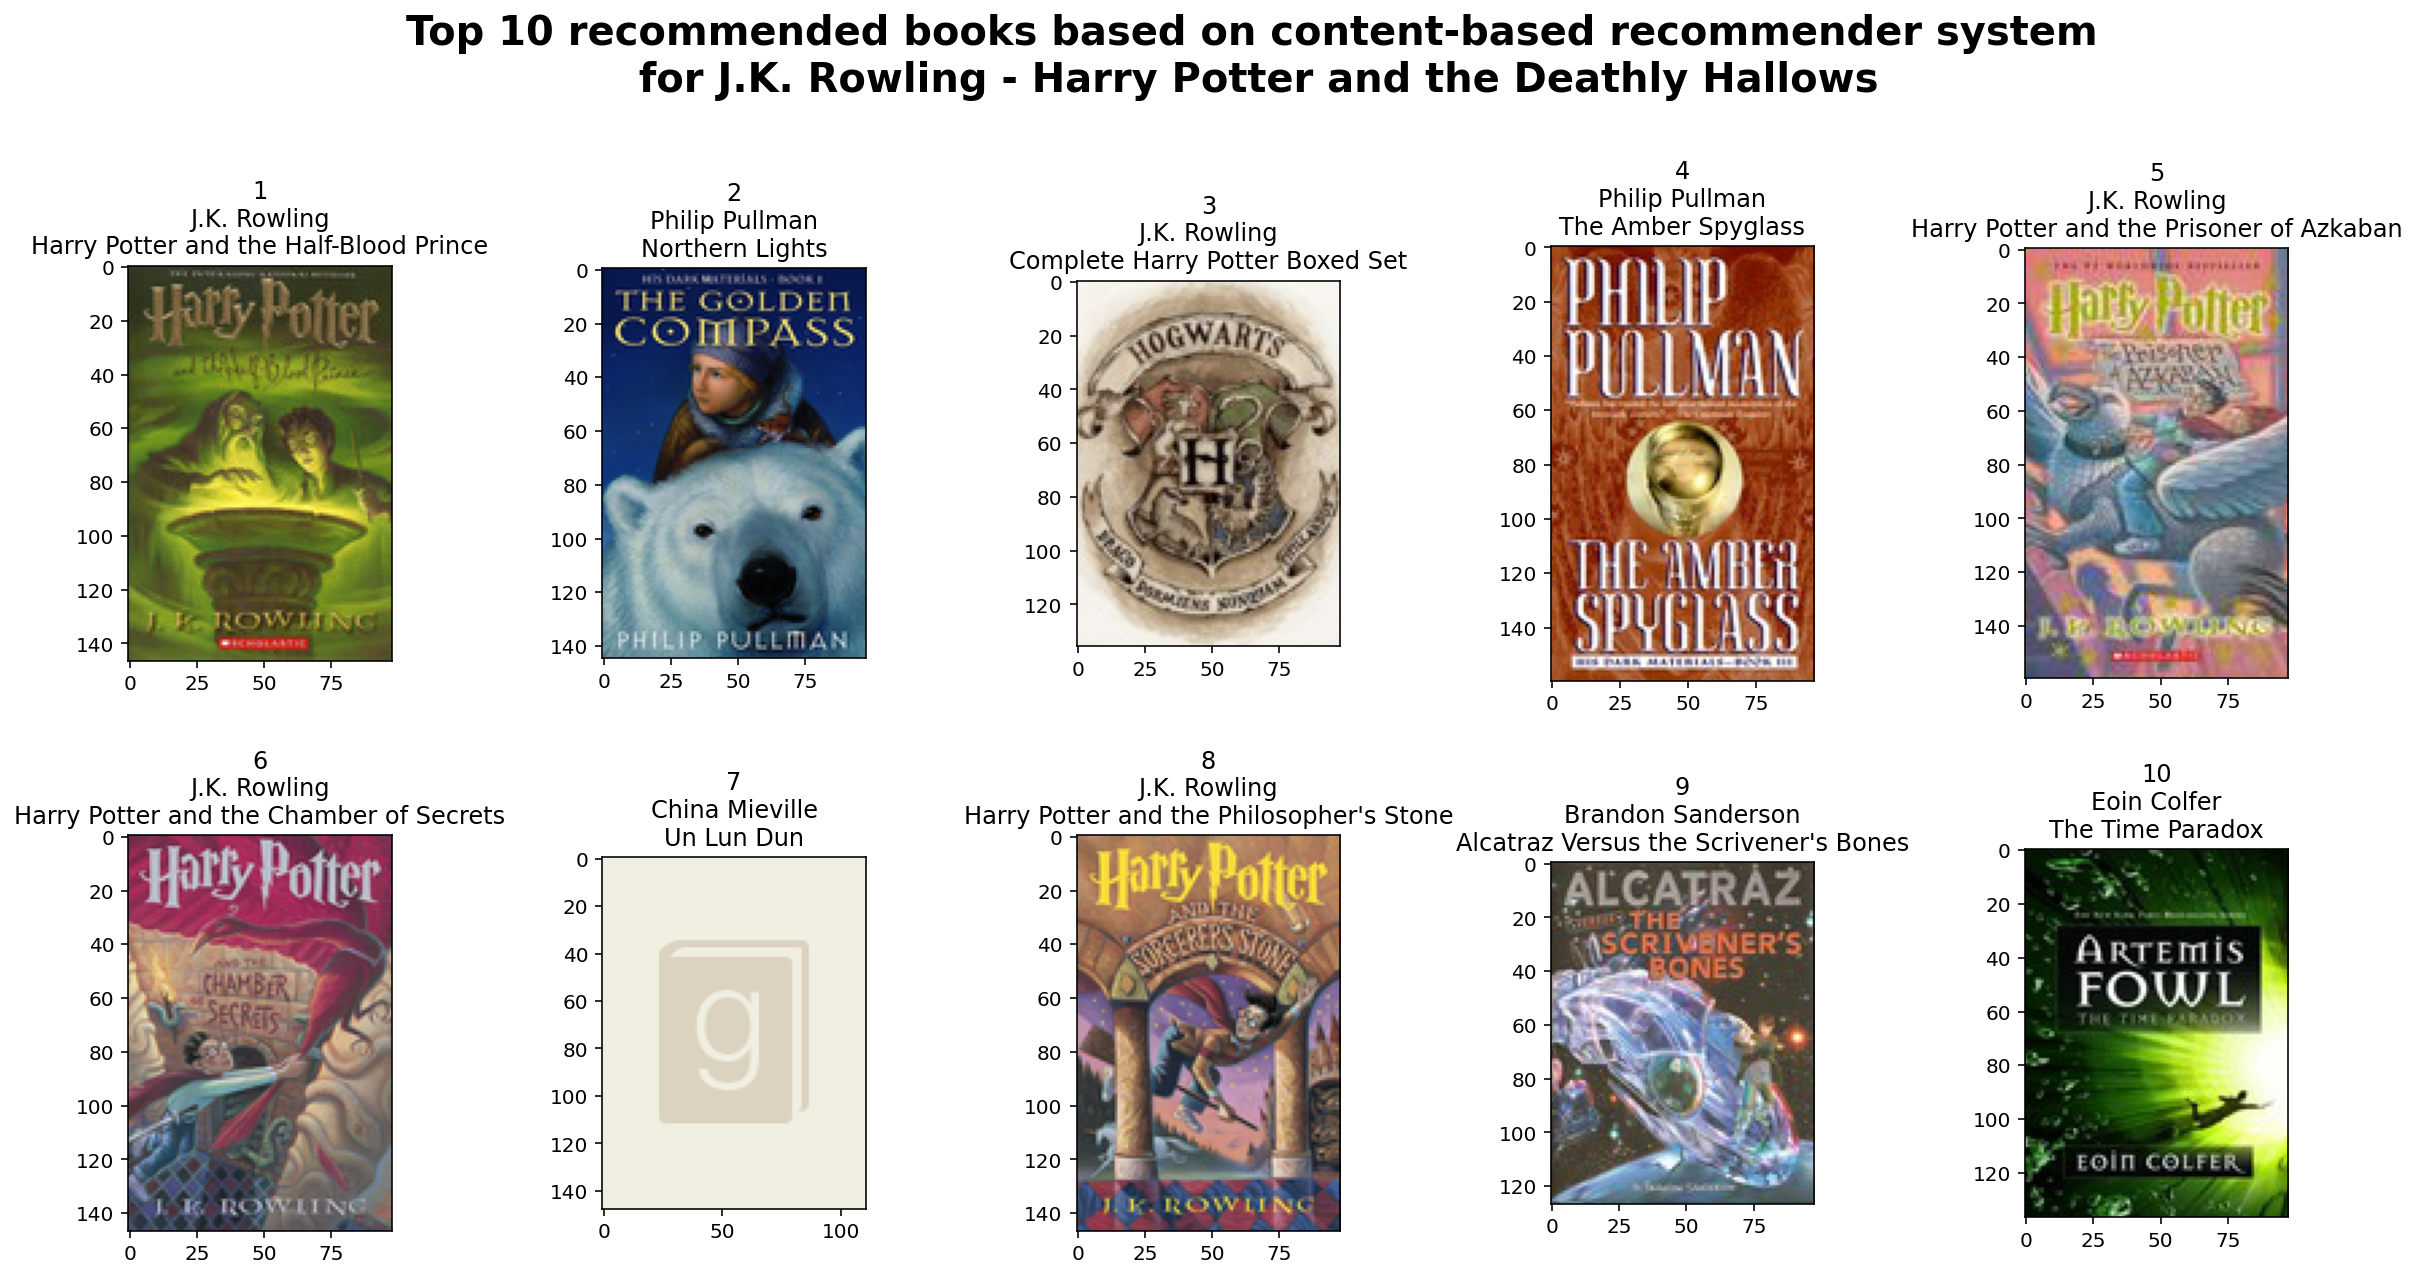

In [12]:
# Plot the top 10 recommended books based on popularity-based recommender system
plt.figure(figsize = (8,8))
plt.suptitle("Top 10 recommended books based on content-based recommender system\n for J.K. Rowling - Harry Potter and the Deathly Hallows", x = 1.10, y=1.20, fontsize = 20, weight = "bold");
plt.subplots_adjust(left=None, bottom=None, right=2.0, top=1.0, wspace=0.8, hspace=0.3)
for i in range(len(top_10_similar_books)):
    plt.subplot(2,5,(i+1))
    plt.title(f"{(i+1)}\n{similar_books_url.first_author_name[i]}\n{similar_books_url.title[i]}")
    plt.imshow(top_10_similar_books[i])
plt.show()

**Analysis: There are 5 J.K.Rowling books that are listed as similar books as one of J.K.Rowling books**

Harry Potter and the Deathly Hallows have a genre of children, fantasy, fiction, mystery and young-adult. The content-based recommender system that are based on genre are able to recommend 5 other J.K.Rowling books, which are part of the series as the book "Harry Potter and the Deathly Hallows" are in. There are other books that are recommended as well, which are Philip Pullman books, China Mieville - Un Lun Dun, Brandon Sanderson - Alcatraz Versus the Scrivener's Bones and Eoin Colfer - the time paradox. Surprisingly, China Mieville - Un Lun Dun and Brandon Sanderson - Alcatraz Versus the Scrivener's Bones that do not have mystery genre are placed as the top 10 similar books. This could be due to the low value of mystery genre component in this book, resulting in other books that have other similar genre but not mystery genre are recommended as well. Nevertheless, the content-recommender system is able to recommend similar books based on genre.

### 6.5 Summary

**Popularity-based recommender system**

The popularity-based recommender system is based on popularity using IMDB weighted rating. Most of the books in the top 10 popular books are J.K.Rowling books. This results coincide with the exploratory data analysis results in which J.K.Rowling has the highest ratings counts of all the books as an author. Meanwhile, there are three other books that have lower number of votes but high average_rating are in the top 10 popular books as well, which suggests there are some novelty books apart from the highly popular books.

**Content-based recommender system**

The content-based recommender system is based on genre and Harry Potter and the Deathly Hallows book was used as an example. Harry Potter and the Deathly Hallows have a genre of children, fantasy, fiction, mystery and young-adult. 
This recommender system is able to recommend other J.K.Rowling books, which are part of the series this book is in and other similar books that have the same genre.